In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('insurance.csv')
X = df.drop(columns = ['children', 'sex', 'region', 'charges'])
y = df['charges']

In [82]:
X

,age,bmi,smoker
0,19,27.900,yes
1,18,33.770,no
2,28,33.000,no
3,33,22.705,no
4,32,28.880,no
...,...,...,...
1333,50,30.970,no
1334,18,31.920,no
1335,18,36.850,no
1336,21,25.800,no


This is a dataframe representing the <b>independent variables (age, smoker and BMI)</b>. I have only taken these variables as they have the greatest effect on the charges. 

In [83]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

This represents the <b>dependent</b> variable, <b>charges</b>. We are trying to predict this using the independent variables.

<h3>Test/train split</h3>

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55, test_size = 0.2)
X_train

,age,bmi,smoker
911,18,31.730,yes
769,38,19.475,no
961,29,25.900,no
863,36,19.855,no
648,18,28.500,no
...,...,...,...
541,20,31.790,no
968,21,25.745,no
295,18,22.990,no
666,49,28.700,no


I have done an <b>80/20</b> split of the data set: 80% for training and 20% for testing. <b>X_train and y_train</b> are the <b>independent and dependent variables</b> respectively, which we will be using to train the model. <b>X_test and y_test</b> are the data we will be using to <b>test the model</b>.

In [85]:
print("Train size = " + str(len(X_train)))
print("Test size = " + str(len(X_test)))

Train size = 1070
Test size = 268


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = ['age', 'bmi']
cat_features = ['smoker']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers = [("num", StandardScaler(), num_features), ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_features)])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(), ['age', 'bmi']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['smoker'])])

First I split the features into <b>numerical features</b> (age and BMI) and <b>categorical features</b> (smoker). I then ran <b>Standard Scaler</b> on the numerical features to <b>standardize</b> the data with a <b>mean</b> of 0 and a <b>standard deviation</b> of 1. I also ran <b>One Hot Encoder</b> on the categorical features, and transformed them into dummy columns <b>smoker_yes</b> and <b>smoker_no</b>. <b>ColumnTransformer</b> then concatenates the columns into a singular <b>feature matrix</b>. Hence, <b>preprocessor</b> outputs a matrix that is suitable for modelling.

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

linear_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", LinearRegression())])
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", Ridge(alpha = 1.0))])

rf_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=55,
        n_jobs=-1
    ))])

xgb_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=55,
        n_jobs=-1
    ))])

I have created 4 machine learning pipelines: Linear Regression, Ridge Regression, Random Forest Regression and XGBoost Regression.
1. <b><u>Linear Regression</u></b> - Creates a straight line relationship between the inputs and charges
2. <b><u>Ridge Regression</u></b> - Similar to linear regression, but reduces coefficients slightly to prevent overfitting
3. <b><u>Random Forest Regression</u></b> - Builds decision trees and random samples, and then finds the average
4. <b><u>XGBoost Regression</u></b> - Builds trees that build on its previous trees and correct them

In [88]:
linear_pipeline.fit(X_train, y_train)
linear_y_predicted = linear_pipeline.predict(X_test)

ridge_pipeline.fit(X_train, y_train)
ridge_y_predicted = ridge_pipeline.predict(X_test)

rf_pipeline.fit(X_train, y_train)
rf_y_predicted = rf_pipeline.predict(X_test)

xgb_pipeline.fit(X_train, y_train)
xgb_y_predicted = xgb_pipeline.predict(X_test)

The training data is used to <b>fit</b> each model, and then the pipeline is used to <b>predict the charges</b> for the test data using the <b>X_test</b> data.

In [89]:
linear_mae = mean_absolute_error(y_test, linear_y_predicted)
ridge_mae = mean_absolute_error(y_test, ridge_y_predicted)
rf_mae = mean_absolute_error(y_test, rf_y_predicted)
xgb_mae = mean_absolute_error(y_test, xgb_y_predicted)

Calculating <b>mean average error</b> for all models

In [90]:
linear_rmse = root_mean_squared_error(y_test, linear_y_predicted)
ridge_rmse = root_mean_squared_error(y_test, ridge_y_predicted)
rf_rmse = root_mean_squared_error(y_test, rf_y_predicted)
xgb_rmse = root_mean_squared_error(y_test, xgb_y_predicted)

Calculating <b>root mean squared error</b> for all models

In [91]:
linear_r2 = r2_score(y_test, linear_y_predicted)
ridge_r2 = r2_score(y_test, ridge_y_predicted)
rf_r2 = r2_score(y_test, rf_y_predicted)
xgb_r2 = r2_score(y_test, xgb_y_predicted)

Calculating <b>R$^2$ score</b> for all models

In [92]:
columns = ['linear', 'ridge', 'rf', 'xgb']
index = ['mae', 'rmse', 'r2']
data = [[linear_mae, ridge_mae, rf_mae, xgb_mae], [linear_rmse, ridge_rmse, rf_rmse, xgb_rmse], [linear_r2, ridge_r2, rf_r2, xgb_r2]]
model_stats = pd.DataFrame(data, columns = columns, index = index)
model_stats

,linear,ridge,rf,xgb
mae,4529.879202,4532.203012,2996.197655,2965.886456
rmse,6428.991242,6423.759195,5276.705290,5027.754977
r2,0.687978,0.688485,0.789803,0.809169


A comparison of <b>MAE, RMSE and R$^2$ score</b> for all 4 models.

In [93]:
from sklearn.model_selection import RandomizedSearchCV
param_dist_rf = {
    "model__n_estimators": [200, 400, 600, 800, 1000],
    "model__max_depth": [None, 5, 10, 20, 40],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"]
}

This is a search space that has possible values for <b>hyperparameters</b> for the Random Forest Regressor. These hyperparameters need to be <b>tuned</b> to <b>optimize</b> the regressor:
<br>
<b>n_estimators</b> - Number of trees in the forest
<br>
<b>max_depth</b> - Maximum depth of each tree
<br>
<b>min_samples_split</b> - Minimum number of samples required to split a node
<br>
<b>min_samples_leaf</b> - Minimum samples required at leaf node
<br>
<b>max_features</b> - The number of features that are considered at each split

In [94]:
random_search_rf = RandomizedSearchCV(
    estimator = rf_pipeline,
    param_distributions = param_dist_rf,
    n_iter = 20,
    scoring = "neg_mean_absolute_error",
    cv = 5,
    random_state = 55,
    n_jobs=-1
)

<b>RandomizedSearchCV</b> is used to choose the optimal hyperparameter combination:
<br>
<b>estimator</b> - The Random Forest Pipeline is being tested
<br>
<b>n_iter</b> - Instead of iterating through all possibilities, it just iterates through 20 random ones and selects the best outcome
<br>
<b>scoring</b> - Method to choose the hyperparameter combination
<br>
<b>cv</b> - Using 5-fold cross validation: training data is split into 5 parts, with 4 for training and 1 for validation

In [95]:
import warnings
from sklearn.exceptions import FitFailedWarning

random_search_rf.fit(X_train, y_train)
print("Best params: ", random_search_rf.best_params_)
print("Best MAE: ", -random_search_rf.best_score_)
warnings.filterwarnings("ignore", category=FitFailedWarning)

Best params:  {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 5}
Best MAE:  2524.6065829435397


In [96]:
param_dist_xgb = {
    "model__n_estimators": [300, 500, 800, 1000, 1200],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],   
    "model__max_depth": [3, 4, 5, 6],            
    "model__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],  
    "model__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "model__reg_lambda": [0.1, 1, 10],                    
    "model__reg_alpha": [0, 0.5, 1]                       
}

This is a search space that has possible values for <b>hyperparameters</b> for the XGBoost Regressor. These hyperparameters need to be <b>tuned</b> to <b>optimize</b> the regressor:
<br>
<b>n_estimators</b> - Number of boosting round
<br>
<b>learning_rate</b> - How much the previous tree is corrected
<br>
<b>max_depth</b> - Maximum depth of each tree
<br>
<b>subsample</b> - The fraction of the training data used for each tree
<br>
<b>colsample_bytree</b> - The fraction of features used for each tree
<br>
<b>reg_lambda</b> - L2 regularization term
<br>
<b>reg_alpha</b> - L1 regularization term

In [97]:
random_search_xgb = RandomizedSearchCV(
    estimator = xgb_pipeline,
    param_distributions = param_dist_xgb,
    n_iter = 25,
    scoring = "neg_mean_absolute_error",
    cv = 5, 
    random_state = 55,
    n_jobs = -1
)

<b>RandomizedSearchCV</b> on the XGBoost pipeline, with the same parameters as the Random Forest Pipeline RandomizedSearchCV.

In [98]:
random_search_xgb.fit(X_train, y_train)
xgb_best_params = random_search_xgb.best_params_
xgb_best_mae = -random_search_xgb.best_score_
print("Best params: ", xgb_best_params)
print("Best MAE: ", xgb_best_mae)

Best params:  {'model__subsample': 0.9, 'model__reg_lambda': 10, 'model__reg_alpha': 1, 'model__n_estimators': 500, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.7}
Best MAE:  2548.9309427861926


In [112]:
# y_test

<b>Validate fit quality and bias</b>

In [114]:
rf_best = random_search_rf.best_estimator_
xgb_best = random_search_xgb.best_estimator_

Best pipelines based on optimized hyperparameters 

In [101]:
rf_best.fit(X_train, y_train)
rf_best_y_predicted = rf_best.predict(X_test)
rf_best_residuals = y_test - rf_best_y_predicted

<b>Predicted values</b> using the best Random Forest Regressor, along with the <b>residuals</b>

In [102]:
xgb_best.fit(X_train, y_train)
xgb_best_y_predicted = xgb_best.predict(X_test)
xgb_best_residuals = y_test - xgb_best_y_predicted

<b>Predicted values</b> using the best XGBoost Regressor, along with the <b>residuals</b>

In [103]:
rf_best_mae = mean_absolute_error(y_test, rf_best_y_predicted)
xgb_best_mae = mean_absolute_error(y_test, xgb_best_y_predicted)

rf_best_rmse = root_mean_squared_error(y_test, rf_best_y_predicted)
xgb_best_rmse = root_mean_squared_error(y_test, xgb_best_y_predicted)

rf_best_r2 = r2_score(y_test, rf_best_y_predicted)
xgb_best_r2 = r2_score(y_test, xgb_best_y_predicted)

data = [[rf_best_mae, xgb_best_mae], [rf_best_rmse, xgb_best_rmse], [rf_best_r2, xgb_best_r2]]
columns_best = ['rf', 'xgb']
best_stats = pd.DataFrame(data, columns = columns_best, index = index)
best_stats

,rf,xgb
mae,2629.746292,2732.564395
rmse,4704.923950,4757.164052
r2,0.832889,0.829157


Error metrics MAE, RMSE and R$^2$ score for both the optimized Random Forest Regressor and XGBoost regressor.

Text(0, 0.5, 'Predicted charge')

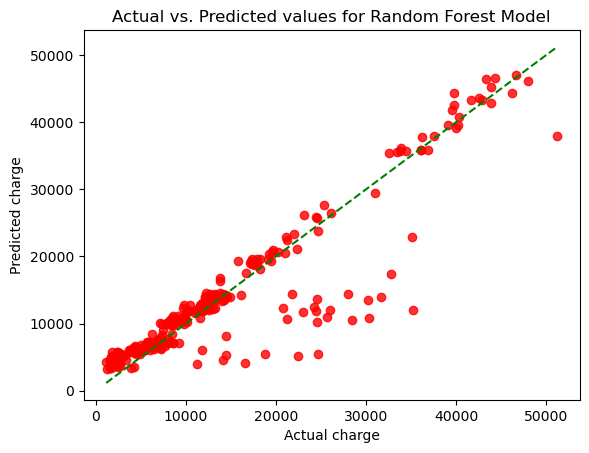

In [104]:
plt.scatter(y_test, rf_best_y_predicted, alpha=0.8, color = "red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="green", linestyle="--")
plt.title("Actual vs. Predicted values for Random Forest Model")
plt.xlabel("Actual charge")
plt.ylabel("Predicted charge")

This graph represents the <b>actual charges</b> compared with the <b>predicted charges</b> of the optimized Random Forest Regressor. The green dashed line represents <b>y = x</b>. The closer the data points hug this line, the more accurate the regressor is, because it indicates how close the predicted charge is to the actual charge.

Text(0, 0.5, 'Predicted charge')

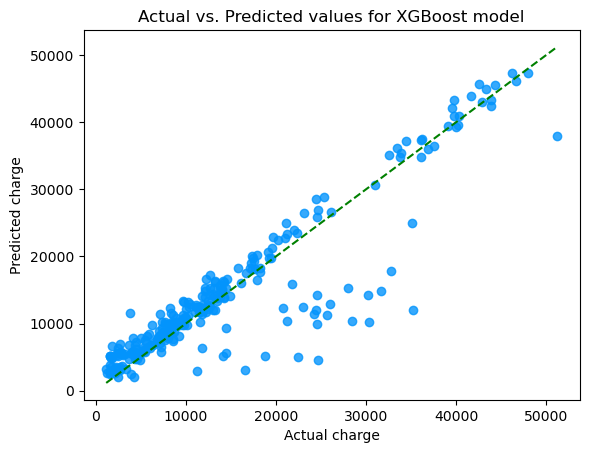

In [105]:
plt.scatter(y_test, xgb_best_y_predicted, alpha=0.8, color = "#0394fc")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="green", linestyle="--")
plt.title("Actual vs. Predicted values for XGBoost model")
plt.xlabel("Actual charge")
plt.ylabel("Predicted charge")

This graph represents the <b>actual charges</b> compared with the <b>predicted charges</b> of the optimized XGBoost Regressor. The green dashed line represents <b>y = x</b>. The closer the data points hug this line, the more accurate the regressor is, because it indicates how close the predicted charge is to the actual charge.

Text(0.5, 1.0, 'Predicted charge vs. Residuals for Random Forest Model')

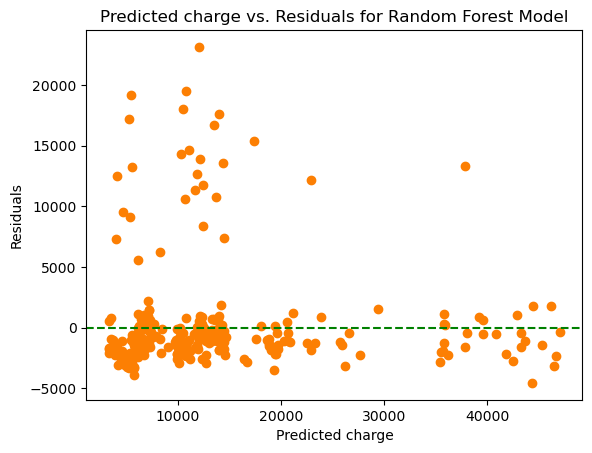

In [106]:
plt.scatter(rf_best_y_predicted, rf_best_residuals, color = "#fc7f03")
plt.axhline(y = 0, linestyle = "--", color = "green")
plt.xlabel("Predicted charge")
plt.ylabel("Residuals")
plt.title("Predicted charge vs. Residuals for Random Forest Model")

This graph represents the <b>residuals</b> compared with the <b>predicted charges</b> of the optimized Random Forest Regressor. The green dashed line represents <b>y = 0</b>. The closer the data points hug this line, the more accurate the regressor is, because residuals (errors) need to be as close to zero as possible.

Text(0.5, 1.0, 'Predicted Charge vs. Residuals for XGBoost Model')

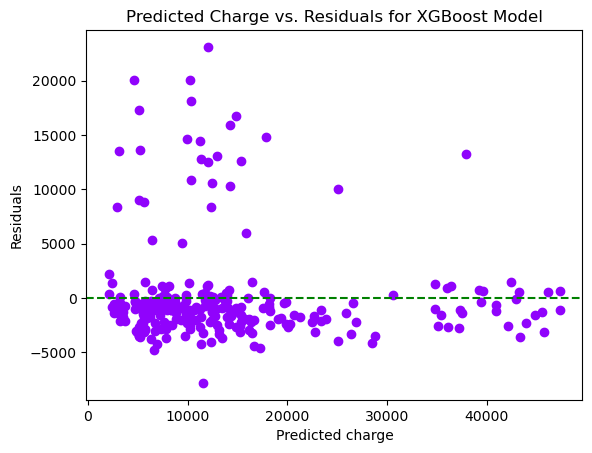

In [107]:
plt.scatter(xgb_best_y_predicted, xgb_best_residuals, color = "#9003fc")
plt.axhline(y = 0, linestyle = "--", color = "green")
plt.xlabel("Predicted charge")
plt.ylabel("Residuals")
plt.title("Predicted Charge vs. Residuals for XGBoost Model")

This graph represents the <b>residuals</b> compared with the <b>predicted charges</b> of the optimized XGBoost Regressor. The green dashed line represents <b>y = 0</b>. The closer the data points hug this line, the more accurate the regressor is, because residuals (errors) need to be as close to zero as possible.

In [110]:
rf_resid_mean = rf_best_residuals.mean()
xgb_resid_mean = xgb_best_residuals.mean()

rf_resid_std = rf_best_residuals.std()
xgb_resid_std = xgb_best_residuals.std()

rf_outliers = len(rf_best_residuals[rf_best_residuals > 15000])
xgb_outliers = len(xgb_best_residuals[xgb_best_residuals > 15000])

data = [[rf_resid_mean, xgb_resid_mean], [rf_resid_std, xgb_resid_std], [rf_outliers, xgb_outliers]]

error_stats = pd.DataFrame(data, columns = ["rf", "xgb"], index = ["mean", "std", "no. of outliers"])
error_stats

,rf,xgb
mean,345.090863,153.254510
std,4701.030013,4763.590426
no. of outliers,8.000000,7.000000


This dataframe shows the stats of the optimized Random Forest and XGBoost Regressors. It shows the <b>mean</b> of the residuals (closer to zero is better), the <b>standard deviation</b>, and the <b>number of outliers</b> (the lower the number of outliers, the better)

In [109]:
import joblib
best_pipeline = joblib.dump(xgb_best, "xgb_best.joblib")
best_pipeline

['xgb_best.joblib']

This dumps the pipeline into a <b>.joblib</b> file, so that it can be used in the <b>User Interface</b> file